# Question 1 :  K -nearest neighbour classifier


In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

<b>In k-NN classification</b>, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.<br>
<b>In k-NN regression</b>, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

###  some essential functions :

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
def encoder(df):
    maps = None
    for col in df.columns:
        if df[col].dtype == 'object':
            labels = df[col].astype('category').cat.categories.tolist()
            replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
            maps = replace_map_comp
            df.replace(replace_map_comp, inplace=True)
            df[col].astype('float')
    return df , maps

In [3]:
def knn(train_df_x , train_df_y , dim_array_x , K):
    temp_df = train_df_x.copy()
    temp_df = temp_df.sub(list(dim_array_x),axis = "columns")
    temp_df = np.square(temp_df)
    temp_df = temp_df.sum(axis = 1).pow(1./2)
    idx = np.argpartition(temp_df, K)
    prediction = train_df_y.take(list(idx[:K])).value_counts().argmax()
    return prediction
        

In [4]:

#Assumption : prediction class is last column

def validate_model(train_df , val_df, predict_class, K , size_cm):
    prediction = []
    train_df_x = train_df.iloc[:,0:len(train_df.columns)-1]
    val_df_x = val_df.iloc[:,0:len(val_df.columns)-1]
    train_df_y  = train_df.iloc[:,-1]
    val_df_y = val_df.iloc[:,-1]
    
    conf_matrix = np.array([[0]*size_cm for i in range(size_cm)])
    conf_matrix = conf_matrix.astype('float')
    
    
    for index, row in val_df_x.iterrows():
        pred = knn(train_df_x,train_df_y , row , K)
        prediction.append(pred)
        conf_matrix[val_df_y[index]][pred] += 1
    
    
    precision = np.diag(conf_matrix)/np.sum(conf_matrix , axis = 0)
    recall = np.diag(conf_matrix) / np.sum( conf_matrix, axis = 1)
    f1_score = 2*precision*recall/(precision + recall)
    
    report_data = []
    report_data.append(precision)
    report_data.append(recall)
    report_data.append(f1_score)
    report_data_trans = zip(*report_data)
    report  = pd.DataFrame(report_data_trans, columns=["precision" , "recall",  "f1_score"])

    
    return prediction , conf_matrix.astype('int'), report
        
    
    
    

## Q1. Part 1 and Part 2 :  

##  KNN Classifier for Iris dataset

In [5]:
def import_iris_data(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = ['sepal_length' , 'sepal_width' ,  'petal_legth' , 'petal_width' , 'class']
    balance_data.columns =  attrq
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)


    train_data = balance_data.iloc[:int(balance_data.shape[0]*0.8),:]
    validation_data = balance_data.iloc[int(balance_data.shape[0]*0.8) + 1:,:]
    train_data.columns = attrq
    validation_data.columns = attrq
    return train_data , validation_data , maps

In [6]:
train_data, val_data , maps = import_iris_data("Iris/Iris.csv")


In [7]:
print(train_data.head())
print(maps)

   sepal_length  sepal_width  petal_legth  petal_width  class
0           6.3          3.4          5.6          2.4      2
1           5.8          2.7          5.1          1.9      2
2           6.7          3.1          4.4          1.4      1
3           6.1          2.9          4.7          1.4      1
4           5.4          3.4          1.5          0.4      0
{'class': {'Iris-virginica': 2, 'Iris-setosa': 0, 'Iris-versicolor': 1}}


==========confusion matrix==========
[[ 8  0  0]
 [ 0 10  0]
 [ 0  0  8]]
==========classification report==========
   precision  recall  f1_score
0        1.0     1.0       1.0
1        1.0     1.0       1.0
2        1.0     1.0       1.0
========= avg result==============
precision    1.0
recall       1.0
f1_score     1.0
dtype: float64


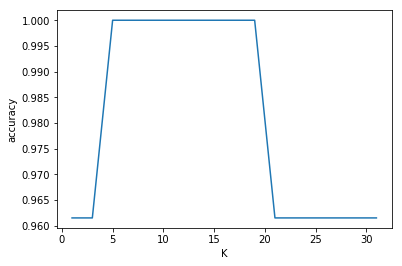

In [8]:
prediction , conf_mat , report = validate_model(train_data, val_data , "class", 7 , 3)
print("==========confusion matrix==========")
print(conf_mat)
print("==========classification report==========")
print(report)
print("========= avg result==============")
print(report.mean())
accuracy_arr = []
k_arr = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    pred , cm , rp = validate_model(train_data,val_data, "class" , k, 3)
    accuracy_arr.append(np.sum(np.diag(cm)).astype('float')/cm.sum())

plt.plot(k_arr, accuracy_arr)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

### Prediction over unseen test data 

In [9]:
def test_function_iris(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = ['sepal_length' , 'sepal_width' ,  'petal_legth' , 'petal_width' , 'class']
    balance_data.columns =  attrq
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    return balance_data
  

In [10]:
file_name = str(raw_input())
test_data = test_function_iris(file_name)
prediction , test_conf_mat , test_report = validate_model(train_data, test_data , "class", 7 , 3)
for pre in prediction :
    for key in maps['class'].keys(): 
        if maps['class'][key] == pre:
            print(key)
            break
print("==========confusion matrix==========")
print(test_conf_mat)
print("==========classification report==========")
print(test_report)
print("========= avg result==============")
print(report.mean())
print("\n")

Iris/Iris.csv
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-virginica
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-virginica
Iris-setosa
Iris-virginica
Iris-versicolor
Iris-setosa
Iris-setos

### Comparison with  scikit learn model for Iris dataset

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def validate_using_sklearn(train_df , val_df, predict_class, K):
    neighbors = np.arange(1,9)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    train_df_x = train_df.iloc[:,0:len(train_df.columns)-1]
    val_df_x = val_df.iloc[:,0:len(val_df.columns)-1]
    train_df_y  = train_df.iloc[:,-1]
    val_df_y = val_df.iloc[:,-1]
    
    
    for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(train_df_x, train_df_y)
        train_accuracy[i] = knn.score(train_df_x,train_df_y)
        test_accuracy[i] = knn.score(val_df_x, val_df_y)
        
    prediction = knn.predict(val_df_x)
    return confusion_matrix(val_df_y , prediction) , classification_report(val_df_y,prediction)


[[ 8  0  0]
 [ 0 10  0]
 [ 0  0  8]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        26



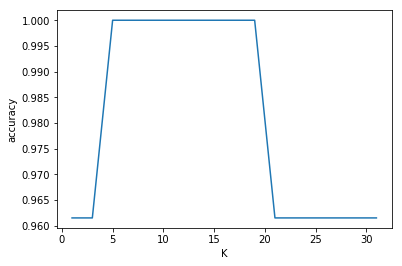

In [12]:
cm1  , cr1 = validate_using_sklearn(train_data, val_data , "class", 7)
print(cm1)
print(cr1)

accuracy_arr1 = []
k_arr1 = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    cm1 , rp1 = validate_using_sklearn(train_data,val_data, "class" , k)
    accuracy_arr1.append(np.sum(np.diag(cm1)).astype('float')/cm1.sum())

plt.plot(k_arr1, accuracy_arr1)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()


# KNN classification for Robot data set

### some essential function 

In [23]:
def import_robot_data(filename):
    balance_data = pd.read_csv( filename,  sep = ' ')
#     balance_data.drop(balance_data.columns[0], balance_data.columns[8]] , axis =1)
    
    attrq = ['nan','class', 'a1', 'a2', 'a3', 'a4' , 'a5' ,'a6', 'Id']
    balance_data.columns =  attrq
    balance_data = balance_data.drop(['Id', 'nan'] , axis = 1)
    
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    balance_data = balance_data[['a1', 'a2',  'a3',  'a4',  'a5',  'a6','class']]
    
    train_data = balance_data.iloc[:int(balance_data.shape[0]*0.8),:]
    validation_data = balance_data.iloc[int(balance_data.shape[0]*0.8) + 1:,:]
    train_data.columns = balance_data.columns
    validation_data.columns = balance_data.columns
    return train_data , validation_data , maps

## Robot1 dataset 

In [30]:
train_data , val_data ,maps = import_robot_data('robot/Robot1')


==========confusion matrix==========
[[14  3]
 [ 1  6]]
==========classification report==========
   precision    recall  f1_score
0   0.933333  0.823529     0.875
1   0.666667  0.857143     0.750
========= avg result==============
precision    0.800000
recall       0.840336
f1_score     0.812500
dtype: float64


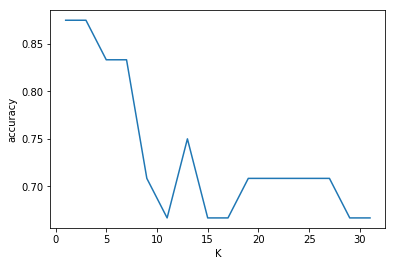

In [31]:
prediction ,conf_mat , report = validate_model(train_data, val_data , "class", 7 , 2)
print("==========confusion matrix==========")
print(conf_mat)
print("==========classification report==========")
print(report)
print("========= avg result==============")
print(report.mean())
accuracy_arr = []
k_arr = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    pred , cm , rp = validate_model(train_data,val_data, "class" , k, 2)
    accuracy_arr.append(np.sum(np.diag(cm)).astype('float')/cm.sum())

plt.plot(k_arr, accuracy_arr)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

###  Predicting unseen test data using robot1 trained model

In [32]:
def import_test_robot_data(filename):
    balance_data = pd.read_csv( filename,  sep = ' ')
#     balance_data.drop(balance_data.columns[0], balance_data.columns[8]] , axis =1)
    
    attrq = ['nan','class', 'a1', 'a2', 'a3', 'a4' , 'a5' ,'a6', 'Id']
    balance_data.columns =  attrq
    balance_data = balance_data.drop(['Id', 'nan'] , axis = 1)
    
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    balance_data = balance_data[['a1', 'a2',  'a3',  'a4',  'a5',  'a6','class']]
    return balance_data

In [33]:
file_name = str(raw_input())
test_data = import_test_robot_data(file_name)
prediction , test_conf_mat , test_report = validate_model(train_data, test_data , "class", 7 , 2)
for pre in prediction :
    if maps == None : 
        print pre
        continue
    for key in maps['class'].keys(): 
        if maps['class'][key] == pre:
            print(key)
            break
print("==========confusion matrix==========")
print(test_conf_mat)
print("==========classification report==========")
print(test_report)
print("========= avg result==============")
print(report.mean())
print("\n")

robot/Robot1
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
==========confusion matrix==========
[[54  8]
 [10 51]]
==========classification report==========
   precision    recall  f1_score
0   0.843750  0.870968  0.857143
1   0.864407  0.836066  0.850000
========= avg result==============
precision    0.800000
recall       0.840336
f1_score     0.812500
dtype: float64




### Robot 1 dataset - comparision with scikitlearn  model 

[[13  4]
 [ 1  6]]
             precision    recall  f1-score   support

          0       0.93      0.76      0.84        17
          1       0.60      0.86      0.71         7

avg / total       0.83      0.79      0.80        24



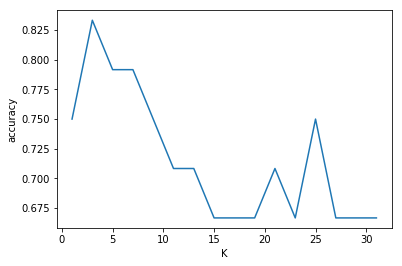

In [34]:
cm1  , cr1 = validate_using_sklearn(train_data, val_data , "class", 7)
print(cm1)
print(cr1)

accuracy_arr1 = []
k_arr1 = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    cm1 , rp1 = validate_using_sklearn(train_data,val_data, "class" , k)
    accuracy_arr1.append(np.sum(np.diag(cm1)).astype('float')/cm1.sum())

plt.plot(k_arr1, accuracy_arr1)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()


##  Robot2 dataset

In [35]:
train_data , val_data ,maps = import_robot_data('robot/Robot2')
print(train_data.head())

   a1  a2  a3  a4  a5  a6  class
0   1   3   2   1   4   2      0
1   1   2   1   2   2   2      1
2   1   2   1   3   4   1      0
3   2   3   2   1   1   2      0
4   1   3   2   2   3   2      0


==========confusion matrix==========
[[ 8  1]
 [ 4 11]]
==========classification report==========
   precision    recall  f1_score
0   0.666667  0.888889  0.761905
1   0.916667  0.733333  0.814815
========= avg result==============
precision    0.791667
recall       0.811111
f1_score     0.788360
dtype: float64


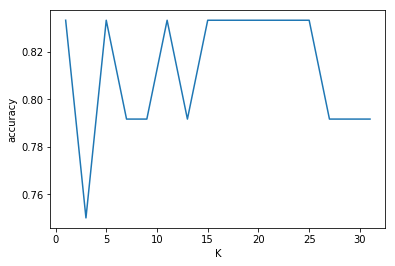

In [36]:
pred ,conf_mat , report = validate_model(train_data, val_data , "class", 7 , 2)
print("==========confusion matrix==========")
print(conf_mat)
print("==========classification report==========")
print(report)
print("========= avg result==============")
print(report.mean())
accuracy_arr = []
k_arr = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    pre, cm , rp = validate_model(train_data,val_data, "class" , k, 2)
    accuracy_arr.append(np.sum(np.diag(cm)).astype('float')/cm.sum())

plt.plot(k_arr, accuracy_arr)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

### Robot 2 dataset - Comparison with scikitlearn model 

[[ 9  0]
 [ 5 10]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78         9
          1       1.00      0.67      0.80        15

avg / total       0.87      0.79      0.79        24



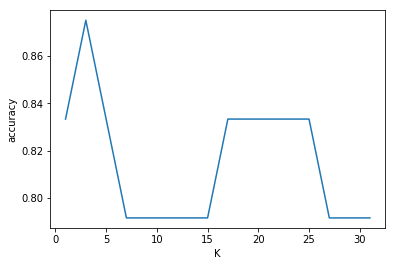

In [37]:
cm1  , cr1 = validate_using_sklearn(train_data, val_data , "class", 7)
print(cm1)
print(cr1)

accuracy_arr1 = []
k_arr1 = [2*i + 1 for i in range(0,16)]
for k in k_arr:
    cm1 , rp1 = validate_using_sklearn(train_data,val_data, "class" , k)
    accuracy_arr1.append(np.sum(np.diag(cm1)).astype('float')/cm1.sum())

plt.plot(k_arr1, accuracy_arr1)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()


### Possible improvments in KNN 

Most K-NN models use Euclidean or Manhattan distance as the go-to distance metric. These metrics are simple and perform well in a wide variety of situations.But there are other metrices also which can give better performance for certain data.

# Question2 : Naive Bayes Classifier

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c).

<img src = "bayes.jpg">

### Following is the implementation of Gaussian Naive Bayes algorithm: 

In [38]:
class GBayes(object):
    def __init__(self):
        mean_0 = []
        sd_0 = []
        mean_1 = []
        sd_1 = []
        prob_0 = 0 
        prob_1 = 0 
        
    def fit(self , train_X,  train_Y):
        df = train_X.assign(target = train_Y)
        df0 =  df[df['target'] == 0]
        df1 = df[df['target'] == 1]
        self.mean_0 = list(df0.mean())
        self.sd_0 = list(df0.std())
        self.mean_1  = list(df1.mean())
        self.sd_1 = list(df1.std())
        del self.mean_0[-1]
        del self.sd_0[-1]
        del self.mean_1[-1]
        del self.sd_1[-1]
        self.prob_0 = float(df0.shape[0])/df.shape[0]
        self.prob_1 = float(df1.shape[0])/df.shape[0]

    def predict(self, val_X):
        val_0 = val_X.copy()
        val_1 = val_X.copy()
        val_0 = np.square(val_0.sub(list(self.mean_0),axis = "columns"))
        val_1 = np.square(val_1.sub(self.mean_1,  axis = "columns"))
        
        val_0 = val_0.mul(-1)
        val_1 = val_1.mul(-1)
        
        val_0 = np.exp(np.divide(val_0,  [float(i*i) for i  in self.sd_0]))
        val_1 = np.exp(np.divide(val_1 , [float(i*i) for i  in self.sd_1]))
        val_0 = np.divide(val_0, [i*4.4429 for i  in self.sd_0])
        val_1 = np.divide(val_1,  [i*4.4429 for i  in self.sd_1])
        val_0 = np.prod(val_0,  axis=1)*self.prob_0
        val_1 = np.prod(val_1 , axis=1)*self.prob_1

        
        prediction = []
        for i in range(val_0.shape[0]):
            if val_0.iloc[i,] > val_1.iloc[i,]:prediction.append(0)
            else : prediction.append(1)
                
        return prediction
        

In [39]:
def validate(train_df, val_df):
        
    train_X = train_df.iloc[:,:len(train_df.columns)-1]
    train_Y = train_df.iloc[:,-1]
    val_X = val_df.iloc[:,:len(val_df.columns) -1]
    val_Y = val_df.iloc[:,-1]
    
    model = GBayes()
    model.fit(train_X , train_Y)
    prediction = model.predict(val_X)
    
    conf_matrix = [[0]*2 for i  in range(2)]
    report  = None
    for i in range(len(prediction)):
        conf_matrix[val_Y.iloc[i,]][prediction[i]] += 1
    
    return list(prediction) , conf_matrix
    

In [40]:
def import_data_nb(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = ['a',  'b' , 'c' , 'd' , 'e' , 'f' , 'g' , 'h' , 'i' , 'j' , 'k',  'l',  'm', 'n']
    balance_data.columns =  attrq
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    balance_data = balance_data[['a',  'b' , 'c' , 'd' , 'e' , 'f' , 'g' , 'h' , 'i'  , 'k',  'l',  'm', 'n',  'j']]
    
    train_data = balance_data.iloc[:int(balance_data.shape[0]*0.8),:]
    validation_data = balance_data.iloc[int(balance_data.shape[0]*0.8) + 1:,:]
    
    train_data.columns = balance_data.columns
    validation_data.columns = balance_data.columns
    
    return train_data , validation_data , maps

In [41]:
train_data, val_data , maps = import_data_nb("loan/data.csv")


In [42]:
print(train_data.head())

      a   b   c   d      e  f     g  h    i  k  l  m  n  j
0  3086  55  29  71  91311  3  0.30  2    0  0  0  0  1  0
1  4618  38  13  41  95521  3  0.50  3    0  0  0  0  1  0
2  2470  43  18  89  92780  1  0.10  2  307  0  0  0  1  0
3   952  59  34  83  94105  2  3.40  3    0  0  0  1  0  1
4  1220  45  18  80  92407  3  2.67  2    0  0  0  0  0  0


### Result using self buit model 

In [43]:
prediction ,conf_matrix = validate(train_data , val_data)
print(conf_matrix)
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[1][0]
fn = conf_matrix[0][1]
tn = conf_matrix[1][1]
total = tp + tn + fp + fn
precision  = float(tp)/(tp + fp+0.001)
recall = float(tp)/(tp + fn +0.001)
f1_score = 2*precision*recall/(precision + recall)

print("acccuracy : " , float(tp + tn)/total)
print("precision : "+ str(precision))
print("recall : "+ str(recall))
print("F1 score : "+ str(f1_score))

[[730, 93], [18, 58]]
('acccuracy : ', 0.8765294771968855)
precision : 0.975934524152
recall : 0.886997707172
F1 score : 0.929343183522


### Predicting over test data

In [44]:
def import_test_nb(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    attrq = ['a',  'b' , 'c' , 'd' , 'e' , 'f' , 'g' , 'h' , 'i' , 'j' , 'k',  'l',  'm', 'n']
    balance_data.columns =  attrq
    balance_data , maps = encoder(balance_data)
    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    balance_data = balance_data[['a',  'b' , 'c' , 'd' , 'e' , 'f' , 'g' , 'h' , 'i'  , 'k',  'l',  'm', 'n',  'j']]
    
    return balance_data

In [45]:
filename = str(raw_input())
test_data = import_test_nb(filename)
test_prediction , test_conf = validate(train_data,test_data)
for ele in test_prediction:
    print(ele)
    
print("confusion_matrix")
print(conf_matrix)
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[1][0]
fn = conf_matrix[0][1]
tn = conf_matrix[1][1]
total = tp + tn + fp + fn
precision  = float(tp)/(tp + fp+0.001)
recall = float(tp)/(tp + fn +0.001)
f1_score = 2*precision*recall/(precision + recall)

print("acccuracy : " , float(tp + tn)/total)
print("precision : "+ str(precision))
print("recall : "+ str(recall))
print("F1 score : "+ str(f1_score))

loan/data.csv
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### comparing with scikit learn model 

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def validate_using_sklearn(train_df , val_df):
    
    train_X = train_df.iloc[:,:len(train_df.columns)-1]
    train_Y = train_df.iloc[:,-1]
    val_X = val_df.iloc[:,:len(val_df.columns) -1]
    val_Y = val_df.iloc[:,-1]
    
    model = GaussianNB()
    model.fit(train_X,train_Y)
    prediction = model.predict(val_X)
    
    return confusion_matrix(val_Y , prediction) , classification_report(val_Y,prediction)


In [47]:
cm,cr = validate_using_sklearn(train_data, val_data)
print(cm)
print(cr)

[[748  75]
 [ 28  48]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.94       823
          1       0.39      0.63      0.48        76

avg / total       0.92      0.89      0.90       899



###  Pros  of Naive Bayes

It is easy and fast to predict class of test data set. It also perform well in multi class prediction<br>
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data

### Cons of Naive Bayes 

If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.<br>

Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.


# Question 3 : Linear Regression

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

<i><b>The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.</b></i>

### Essential Functions 

In [48]:
def normalize(df):
    mean_df = df.mean()
    sd_df = df.std()
    df = df.sub(mean_df,  axis =1)
    df = np.divide(df, list(sd_df))
    return df

In [49]:
def mean_square_error(a,  b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.square(np.subtract(a,b)))/float(a.shape[0])
    

In [50]:
def mean_absolute_error(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.absolute(np.subtract(a,b)))/float(a.shape[0])

In [51]:
def mean_absolute_percentage_error(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.absolute(np.divide(np.subtract(a,b),a)))/float(a.shape[0])

### Question 3 : Part 1  Implement Linear regression Model 

In [52]:
class linear_regression(object):
    def __init__(self):
        beta = []
    def fit(self ,train_X , train_Y):
        train_X = np.array(train_X)
        train_Y = np.array(train_Y)
        train_X = np.insert(train_X, 0, values=1, axis=1)
        self.beta = np.dot(np.dot(np.linalg.inv(np.dot(train_X.T, train_X)), train_X.T), train_Y)
    def predict(self, val_X):
        val_X = np.array(val_X)
        val_X = np.insert(val_X , 0 , values =1, axis =1)
        return np.dot(val_X,self.beta)

In [53]:
def validate_model(train_data,  val_data):
    train_X = normalize(train_data.iloc[:,:len(train_data.columns)-1])
    train_Y = train_data.iloc[:,-1]
    val_X = normalize(val_data.iloc[:,:len(val_data.columns)-1])
    val_Y =  val_data.iloc[:,-1]
    model = linear_regression()
    model.fit(train_X , train_Y)
    prediction = model.predict(val_X)
    mse = mean_square_error(prediction,val_Y)
    mae = mean_absolute_error(prediction , val_Y)
    mape = mean_absolute_percentage_error(prediction, val_Y)
    return mse , mae , mape,np.array(val_Y), prediction

### importing data 

In [54]:
def import_data(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    balance_data = balance_data.drop(balance_data.columns[0], axis = 1) 
    balance_data , maps = encoder(balance_data)

    balance_data = balance_data.sample(frac=1).reset_index(drop=True)

    train_data = balance_data.iloc[:int(balance_data.shape[0]*0.8),:]
    validation_data = balance_data.iloc[int(balance_data.shape[0]*0.8) + 1:,:]
    train_data.columns = balance_data.columns
    validation_data.columns  = balance_data.columns
    return train_data , validation_data , maps

In [55]:
train_data,val_data,maps = import_data("admission/data.csv")
print(train_data.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        334          117                  5  4.0   4.5  9.07         1   
1        312          100                  1  3.0   3.0  8.53         1   
2        330          120                  5  4.5   5.0  9.56         1   
3        321          111                  5  5.0   5.0  9.45         1   
4        301           98                  1  2.0   3.0  8.03         1   

   Chance of Admit   
0              0.89  
1              0.69  
2              0.93  
3              0.93  
4              0.67  


### Question 3 : Part 2  Performance Comparison 

In [56]:
mse , mae , mape ,val_Y ,prediction = validate_model(train_data , val_data)
print("mean square error = %f"%(mse))
print("mean absolute error = %f"%(mae))
print("mean absolute percentage error = %f"%(mape))


mean square error = 0.003884
mean absolute error = 0.045268
mean absolute percentage error = 0.069203


It doesn't make sense to compare MSE and MAE to each other.  They only make sense in comparison to the same measure of error: you can compare MSE for Method 1 to MSE for Method 2, or MAE for Method 1 to MAE for Method 2, but you can't say MAE is better than MSE for Method 1 because it's smaller.
<b>MAE</b> : What is important about this metric is that it penalizes huge errors that not as that badly as MSE does. Thus, it’s not that sensitive to outliers as mean square error. <br>
<b>MSE</b> :  Useful if we have unexpected values that we should care about. Vey high or low value that we should pay attention.<br>
<b> MAPE  </b> : Mean absolute percentage error is commonly used as a loss function for regression problems and in model evaluation, because of its very intuitive interpretation in terms of relative error.



### Question 3 : Part 3 

### Measures of Model Adequacy

The following sections present some techniques that can be used to check the appropriateness of the model for the given data. These techniques help to determine if any of the model assumptions have been violated.

### important assumptions in regression analysis:
1. Relationship between the outcomes and the predictors is linear.<br>
2. Error term  has mean almost equal to zero for each value of outcome.<br>
3. Error term has constant variance.
4. Errors are uncorrelated.
5. Errors are normally distributed or we have an adequate sample size to rely on large sample theory.


### 1. Residuals vs Fitted plot

This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn’t capture the non-linear relationship. If you find equally spread residuals around a horizontal line without distinct patterns, that is a good indication you don’t have non-linear relationships.



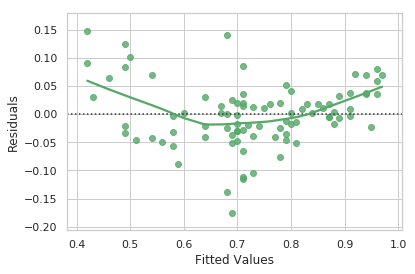

In [57]:
import seaborn as sns
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(val_Y, prediction - val_Y, lowess=True, color="g")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

Looking at the Residuals vs Fitted plot, we see that the gree line (which is just a scatterplot smoother, showing the average value of the residuals at each value of fitted value) is almost flat. This tells us that there is no discernible non-linear trend to the residuals. Furthermore, the residuals appear to be equally variable across the entire range of fitted values. There is no indication of non-constant variance.

### 2. Coefficient of Determination (R2)

The coefficient of determination is a measure of the amount of variability in the data accounted for by the regression model.<br>
The coefficient of determination is the ratio of the regression sum of squares to the total sum of squares.

$$ R^2 =  \frac{\sum_{i=1}^{n} (y_{i} - y_{mean})^2} {\sum_{i=1}^{n} (y_{i_{predicted}} - y_{mean})^2} $$	

In [58]:
from sklearn.metrics import r2_score
print(r2_score(val_Y , prediction))

0.8022185831233405


 Therefore, 84% of the variability in the yield data is explained by the regression model, indicating a very good fit of the model.

### Training over test_data 

In [59]:
def import_test_data(filename):
    balance_data = pd.read_csv( filename ,  sep= ',')
    balance_data = balance_data.drop(balance_data.columns[0], axis = 1) 
    balance_data , maps = encoder(balance_data)

    balance_data = balance_data.sample(frac=1).reset_index(drop=True)
    return balance_data

In [60]:
filename  = str(raw_input())
test_data = import_test_data(filename)
mse , mae , mape ,val_Y ,prediction = validate_model(train_data , test_data)
for ele in prediction : print(ele)
print("mean square error = %f"%(mse))
print("mean absolute error = %f"%(mae))
print("mean absolute percentage error = %f"%(mape))


admission/data.csv
0.8213935959313267
0.5295983290639767
0.8537783730622193
0.7125097715190989
0.526300780377343
0.7930309813265484
0.603076402978763
0.5149760608366749
0.8144251835554729
0.6416222195902754
0.624798623751003
0.7901208869263644
0.8110034392738368
0.6628321102108424
0.45507161956623904
0.9084348744829112
0.8349769269777569
0.6173316044686098
0.6930027672351733
0.6688038634112605
0.8509637816151778
0.8477999589733296
0.7179375399248685
0.5481037473505633
0.5399854125628286
0.7340312094342634
0.6340057687066473
0.7678223145689523
0.5114301833620425
0.6676616560403834
0.6581129793145071
0.7444931423570459
0.6830417534346104
0.6681450872897281
0.9318014182670074
0.648231001481473
0.4697387539944542
0.49233141323375745
0.48787359149628173
0.7137465375813625
0.6049534028185395
0.6205552232148204
0.8242375205851715
0.9297955740512689
0.6263966646465008
0.6988335070443559
0.9685215282330631
0.6973278539173025
0.5435930837950245
0.712706159977469
0.811733521495285
0.8135291192809